In [ ]:
<img src=C:/Users/david/Documents/Deberes/Boletin/>

# Regresion PIB

<h2>Nombre: Esteban David Rosero Perez</h2>

# Introduccion
El producto interior bruto (PIB) es un indicador económico que refleja el valor monetario de todos los bienes y servicios finales producidos por un país o región en un determinado periodo de tiempo, normalmente un año. Se utiliza para medir la riqueza que genera un país. También se conoce como producto bruto interno (PBI).

# Importamos las librerias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leemos la informacion

In [47]:
df=pd.read_csv('PIBEcu.csv', sep = ';')

In [48]:
df.head()

,Country_Name,Country_Code,Year,PIB
0,Ecuador,ECU,1960,9.547575
1,Ecuador,ECU,1961,8.957493
2,Ecuador,ECU,1962,10.241499
3,Ecuador,ECU,1963,9.233322
4,Ecuador,ECU,1964,8.900054


Graficamos el PIB por año en el ecuador para tener un analisis de como ha ido evolucionando en la economia del pais. Recordemos que esto se puede influenciar por cada presidente que estuvo en aquellos años y la gestion economica que tuvo en el Pais, es un marcador que refleja la situacion actual en ese año del pais

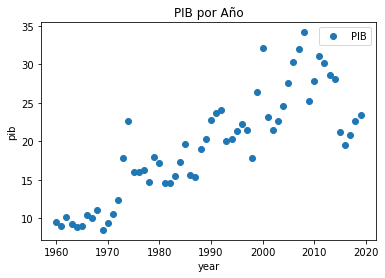

In [49]:
df.plot(x='Year', y='PIB', style='o')
plt.title('PIB por Año')
plt.xlabel('year')
plt.ylabel('pib')
plt.show()

# Modelos de Regresion
Primero procedemos a obtener los datos de entrada y salida, para los datos de entrada vamos a ocupar los valores del año, para los datos de salida vamos a ocupar los valores del PIB

In [50]:
x = df.iloc[:, 2].values.reshape(-1,1)
y = df.iloc[:, 3].values.reshape(-1,1)

<h3>Regresion Lineal</h3>

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
dfpredic = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfpredic

,Actual,Predicted
0,15.629403,18.599230
1,21.286903,21.650356
2,23.390040,29.786692
3,19.005851,19.277258
4,10.580406,13.514020
5,10.241499,10.462894
6,20.279818,21.311342
7,22.604684,29.447678
8,32.127535,23.345426
9,14.656491,17.243174


In [55]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.197858455287695
Mean Squared Error: 17.438954844060294
Root Mean Squared Error: 4.175997466960474


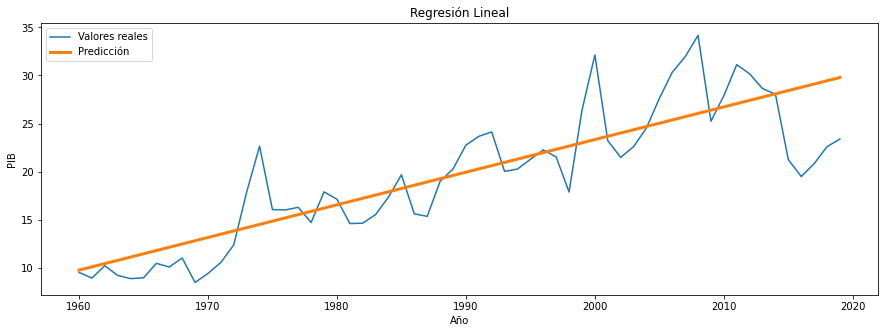

In [57]:
plt.figure(figsize = (15,5))

x = df.iloc[:, 2].values.reshape(-1,1)
y = df.iloc[:, 3].values.reshape(-1,1)

plt.plot(x, y, label ='Valores reales')
plt.plot(x, regressor.predict(x), '-', label = 'Predicción', linewidth = 3)

plt.title('Regresión Lineal') 
plt.xlabel('Año')
plt.ylabel('PIB')
plt.legend(loc="upper left") 

plt.show()

<h3>Regresion Random Forest</h3>

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X_trainr, X_testr, y_trainr, y_testr = train_test_split(x, y, test_size=0.2, random_state=0)

modeloRandom = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRandom.fit(X_trainr, y_trainr.ravel())

y_predrandom = modeloRandom.predict(X_testr)
dfrandom = pd.DataFrame({'Actual': y_testr.flatten(), 'Predicted': y_predrandom.flatten()}) 
dfrandom

,Actual,Predicted
0,15.629403,18.175644
1,21.286903,21.378307
2,23.390040,21.464459
3,19.005851,18.320833
4,10.580406,13.041829
5,10.241499,9.014875
6,20.279818,20.669375
7,22.604684,21.464459
8,32.127535,26.062062
9,14.656491,15.059218


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testr, y_predrandom))
print('Mean Squared Error:', metrics.mean_squared_error(y_testr, y_predrandom))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testr, y_predrandom)))

Mean Absolute Error: 1.4714854646166664
Mean Squared Error: 4.74429897599236
Root Mean Squared Error: 2.1781411744862544


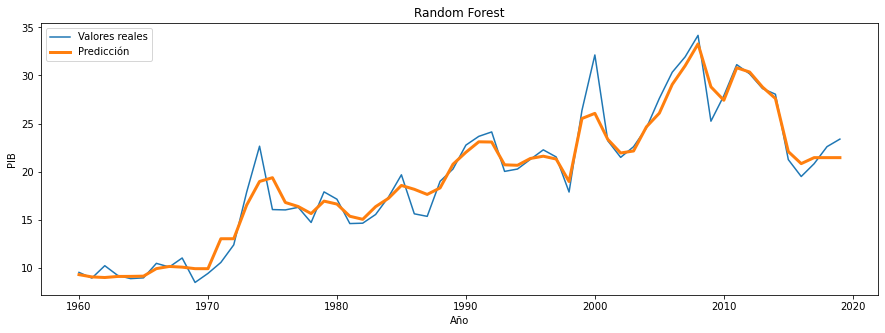

In [64]:
plt.figure(figsize = (15,5))

x = df.iloc[:, 2].values.reshape(-1,1)
y = df.iloc[:, 3].values.reshape(-1,1)

plt.plot(x, y, label ='Valores reales')
plt.plot(x, modeloRandom.predict(x), '-', label = 'Predicción', linewidth = 3)

plt.title('Random Forest') 
plt.xlabel('Año')
plt.ylabel('PIB')
plt.legend(loc="upper left") 

plt.show()

# Resultados
Como podemos observar los niveles de prediccion en el modelo de regresion tienen un margen de error muy amplio, obtenemos como resultado que el error cuadratico medio es de 17, los años que mayor se ven afectados en la prediccion del modelo de regresion, podemos ver que su rango varia desde el año 2000 al 2020. Por otro lado el modelo de Random Forest obtenemos como resultado de que el error cuadratico medio es de 4, como tambien podemos ver en la grafica que los valores reales son muy parecidos a los de la prediccion.

# Opinion
Para realizar un analisis de datos el modelo de random forest nos entrega mejores resultados con un margen de error pequeño en comparacion con los otros modelos de regresion, por lo que para este proyecto en analisis previos se recomendaria utilizar el modelo de random forest, siendo una opcion rapida para obtener resultados optimos.

# Conclusiones
Los modelos de regresion son modelos matematicos que buscan una relacion entre la variable de salida con respecto a otras variables que sean ingresadas como variables de entrada, por ello existen varios modelos en los que hemos demostrado su funcion los cuales fueron regresion lineal y random forest, comparandolos en su funcionamiento llegamos a la conclusion de que el modelo de random forest es mejor ya que matematicamente obteniendo el error cuadratico medio nos da como resultado un 4 a comparacion con el 17 que tiene la regresion lineal